<a href="https://colab.research.google.com/github/johanjan/MOOC-HPFEM-source/blob/master/DigiMat_Pro_Template_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DigiMat Pro: Template


### FEniCS environment setup

In [1]:
#@title
# Setup system environment and define utility functions and variables


from google.colab import files

#!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 3
#!apt install -y software-properties-common python3-software-properties
#!add-apt-repository -y ppa:fenics-packages/fenics
#!apt-get install fenics

try:
    import dolfin
except ImportError as e:
    !apt-get install -y -qq software-properties-common
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    !sed -i "s|#if PETSC_VERSION_MAJOR == 3 && PETSC_VERSION_MINOR <= 8 && PETSC_VERSION_RELEASE == 1|#if 1|" /usr/include/dolfin/la/PETScLUSolver.h
    !rm -rf /usr/lib/python3/dist-packages/mpi4py*
    !rm -rf /usr/lib/python3/dist-packages/petsc4py*
    !rm -rf /usr/lib/python3/dist-packages/slepc4py*
    !rm -rf /usr/lib/petsc/lib/python3/dist-packages/dolfin*
    !rm -rf /usr/lib/petsc/lib/python3/dist-packages/mshr*
    !wget "https://drive.google.com/uc?export=download&id=1cT_QBJCOW_eL3BThnval3bcpb8o0w-Ad" -O /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=119i49bxlGn1mrnhTNmOvM4BqmjrT9Ppr" -O /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-1tVfu8qz3bRC2zvR8n3RESpesWqNnn6" -O /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-3qY4VIJQaXVO1HfGQIzTIURIeJbvX-9" -O /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
    !wget "https://drive.google.com/uc?export=download&id=1-5SMjgjMuee_9WLeYtGe8N_lvipWEN7W" -O /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl
    !pip3 install /tmp/mpi4py-2.0.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/petsc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/slepc4py-3.7.0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/fenics_dolfin-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 install /tmp/mshr-2019.2.0.dev0-cp37-cp37m-linux_x86_64.whl --upgrade
    !pip3 -q install --upgrade sympy
    import dolfin


!wget -c http://www.csc.kth.se/~jjan/digitalmath/plot_u.py
#!wget -c -O ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz 'https://www.paraview.org/paraview-downloads/download.php?submit=Download&version=v5.9&type=binary&os=Linux&downloadFile=ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz'
!wget -c http://www.csc.kth.se/~jjan/digitalmath/ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz
!tar xzvf ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz --skip-old-files 1>plog1 2>plog2



Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

Write or paste your own FEniCS Digital Math formulation here!:

In [2]:
%%writefile file.py

from dolfin import *
from mshr import *



Writing file.py


In [3]:
!mpirun --allow-run-as-root -np 4 python3 file.py


!zip u.zip u*.pvd u*vtu


	zip warning: name not matched: u*.pvd
	zip warning: name not matched: u*vtu

zip error: Nothing to do! (u.zip)


(   2.488s) [paraview        ]       vtkXMLReader.cxx:305    ERR| vtkPVDReader (0x1747a820): Error opening file ./u.pvd
(   2.488s) [paraview        ]       vtkPVDReader.cxx:135    ERR| vtkPVDReader (0x1747a820): Could not read file information
(   2.489s) [paraview        ]       vtkExecutive.cxx:753    ERR| vtkPVCompositeDataPipeline (0x1749db20): Algorithm vtkPVDReader(0x1747a820) returned failure for request: vtkInformation (0x174dbc80)
  Debug: Off
  Modified Time: 394458
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_DATA_OBJECT
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0


(   2.489s) [paraview        ]       vtkXMLReader.cxx:305    ERR| vtkPVDReader (0x1747a820): Error opening file ./u.pvd
(   2.489s) [paraview        ]       vtkPVDReader.cxx:135    ERR| vtkPVDReader (0x1747a820): Could not read file information
(   2.489s) [paraview        ]       vtkExecutive.cxx:753    ERR| vtkPVCompositeDataPipeline (0x1749db20): Algorithm vtkPVDReader(0x1747a82

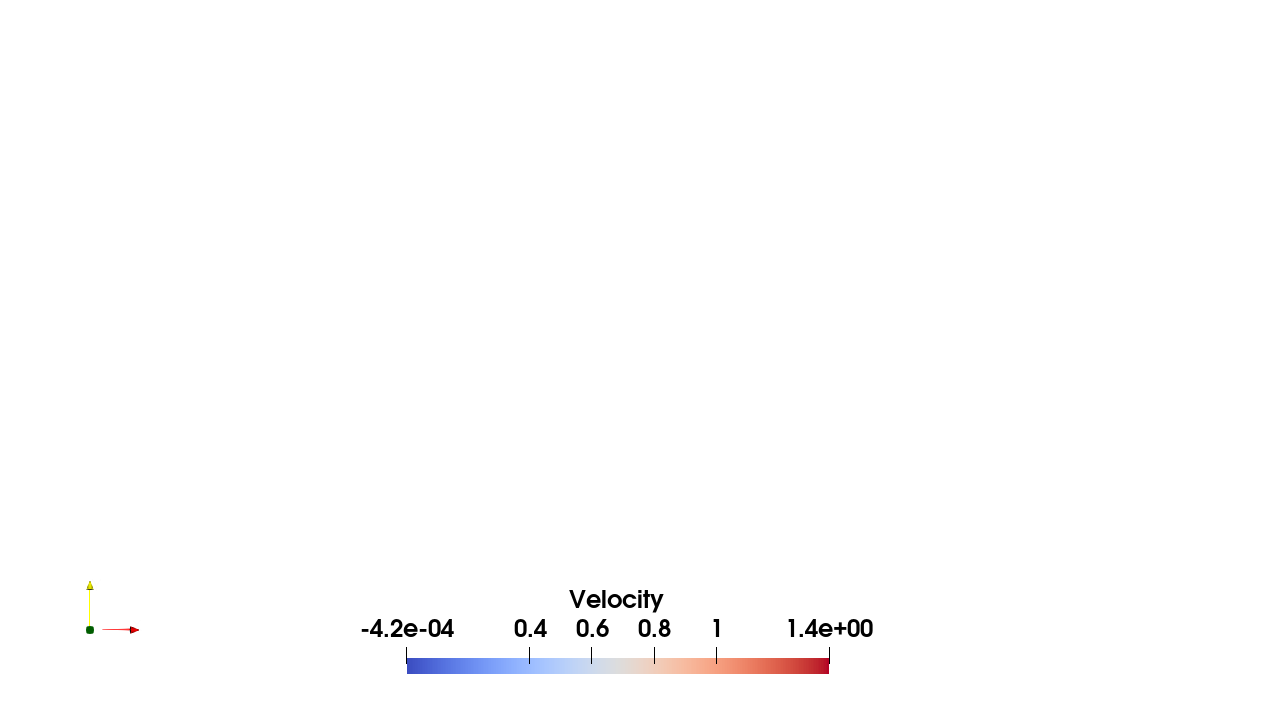

In [4]:
!/content/ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/bin/pvpython plot_u.py


from IPython.display import Image
Image('plot_u.png')

